### 鉴定差异表达基因

In [2]:


setwd("../data/info/")
getwd()

[1] "/home/wangyang/workspace/jupyter/yeast_data/data/info"

In [29]:
#install.packages("BiocManager")


# list.files()

count_tab <- read.table("result.csv",header=T)
rownames(count_tab) <- count_tab$gene_id # count_tab[,1]
# 去掉第一列
count_tab <- count_tab[,-c(1)]
# count_tab <- count_tab[c(1,3,4,2,5)]
# head(count_tab)
#?read.table
# count_tab[c(1,3,4,2,5)]

count_tab_1 <- count_tab[c(1,3,4,2,5)]
count_tab_1

,EV_4,DNMT3B_2,EV_3,DNMT3B_4,DNMT3B_3
,<int>,<int>,<int>,<int>,<int>
ETS1-1,24,32,51,18,17
ETS1-2,0,0,0,0,0
ETS2-1,0,0,0,0,0
ETS2-2,0,0,0,0,0
HRA1,30,19,71,14,24
ICR1,154,198,133,177,203
IRT1,260,618,387,491,555
ITS1-1,14,7,15,5,4
ITS1-2,0,0,0,0,0


In [26]:
res <- data.frame(
   baseMean = apply(count_tab, 1, mean),
   log2FoldChange = apply(count_tab, 1, function(t){ mean(t[4:5]) / mean(t[1:3])})
)
head(res)

,baseMean,log2FoldChange
,<dbl>,<dbl>
ETS1-1,8.2,1.7368421
ETS1-2,0.0,NaN
ETS2-1,0.2,0.0000000
ETS2-2,0.0,NaN
HRA1,31.6,2.6578947
ICR1,180.4,0.7512479


In [32]:
colData <- read.table("AccGroup.csv",header=T)
colData
colData$Condition <- factor(colData$Condition,c("EV","DNMT3B"))

sample_id,Condition
<chr>,<chr>
EV_3,EV
EV_4,EV
DNMT3B_2,DNMT3B
DNMT3B_3,DNMT3B
DNMT3B_4,DNMT3B


### 差异表达基因
1. log2FoldChange 差异倍数取log
2. pvalue
3. padj值越小，说明基因可能是差异表达

ERROR: Error in `[.data.frame`(count_tab, c(1, 2, 3, 4)): undefined columns selected


In [16]:
library(DESeq2)
dds <- DESeqDataSetFromMatrix(countData = count_tab[c(1,3,4,2,5)],
                              colData = colData,
                              design= ~  Condition)
#(nor_count <- counts(dds))

In [17]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [31]:
#head(results(dds)[, 1:2])

results(dds)[,1:2]

res <- data.frame(
   baseMean = apply(count_tab, 1, mean),
   log2FoldChange = apply(count_tab, 1, function(t){ mean(t[4:5]) / mean(t[1:3])})
)
head(res)

log2 fold change (MLE): Condition DNMT3B vs EV 
 
DataFrame with 7127 rows and 2 columns
                   baseMean    log2FoldChange
                  <numeric>         <numeric>
ETS1-1     8.16909901933524 0.827106676359058
ETS1-2                    0                NA
ETS2-1    0.215117481132497  1.11155760341151
ETS2-2                    0                NA
HRA1       31.2337696878622 0.931123155348073
...                     ...               ...
tY(GUA)J2                 0                NA
tY(GUA)M1  0.37630372555215 -2.29334130225147
tY(GUA)M2                 0                NA
tY(GUA)O  0.181929091113566 -1.27899939781913
tY(GUA)Q                  0                NA

,baseMean,log2FoldChange
,<dbl>,<dbl>
ETS1-1,8.2,1.7368421
ETS1-2,0.0,NaN
ETS2-1,0.2,0.0000000
ETS2-2,0.0,NaN
HRA1,31.6,2.6578947
ICR1,180.4,0.7512479


In [38]:
# 将res转换为dataframe
resultsNames(dds) # lists the coefficients
res <- results(dds, name="Condition_DNMT3B_vs_EV")
res <- res[order(res$padj),]
resDF <- as.data.frame(res)


head(resDF)
class(resDF)
write.table(resDF,file="yeast_DESeq2_DEG.tab",sep="\t",quote=FALSE)
#resDF
#resDF$gene_id <- rownames(resDF) # 添加一列gene_id
#resDF <- resDF[,c(7,1,2,3,4,5,6)] # 将gene_id放到第一列
# write.table(resDF,file="yeast_DESeq2_DEG.txt",sep="\t",quote=F,row.names=F)
#head(resDF)
# or to shrink log fold changes association with condition:
# res <- lfcShrink(dds, coef="condition_trt_vs_untrt", type="apeglm")

[1] "Intercept"              "Condition_DNMT3B_vs_EV"

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YGL009C,37238.9226,-4.529624,0.2740966,-16.52565,2.398399e-61,1.519146e-57
YKL120W,2230.6554,-4.030774,0.2519001,-16.00148,1.247727e-57,3.951553e-54
YOR226C,594.3874,-3.018230,0.1948892,-15.48690,4.252942e-54,8.979378e-51
YHR208W,13975.7921,-3.309711,0.2269014,-14.58656,3.420033e-48,5.415623e-45
YCL018W,7781.0195,-3.178588,0.2327366,-13.65745,1.822574e-42,2.308836e-39
YLR355C,29121.5579,-2.157462,0.1668011,-12.93434,2.880789e-38,3.041153e-35


[1] "data.frame"

ERROR: Error in is.data.frame(x): object 'readDF' not found


In [86]:
normlized_counts <- counts(dds, normalized=TRUE)
normlized_counts<-na.omit(normlized_counts)
class(normlized_counts)
head(normlized_counts)

[1] "matrix"

,DNMT3B_2,DNMT3B_3,DNMT3B_4,EV_3,EV_4
ETS1-1,7.277164,3.887493,7.529112,13.19287,8.958862
ETS1-2,0.000000,0.000000,0.000000,0.00000,0.000000
ETS2-1,0.000000,0.000000,1.075587,0.00000,0.000000
ETS2-2,0.000000,0.000000,0.000000,0.00000,0.000000
HRA1,17.283264,23.324956,15.058224,66.90667,33.595731
ICR1,184.658027,204.093366,202.210432,133.81335,178.057377


In [8]:
# 计算 log2FoldChange and beasMean
trt <- normlized_counts['ETS1-1', c(1,2,3)]
untrt <-  normlized_counts['ETS1-1', c(4,5)]
# log2FoldChange calculation
log2(mean(untrt+1))-log2(mean(trt+1))
mean(normlized_counts[1,])

ERROR: Error in eval(expr, envir, enclos): object 'normlized_counts' not found


,baseMean,log2FoldChange
,<dbl>,<dbl>
ETS1-1,3.054435,0.8298243
ETS1-2,-Inf,NaN
ETS2-1,-Inf,-Inf
ETS2-2,-Inf,NaN
HRA1,4.932430,1.4373127
ICR1,7.453381,-0.3371543


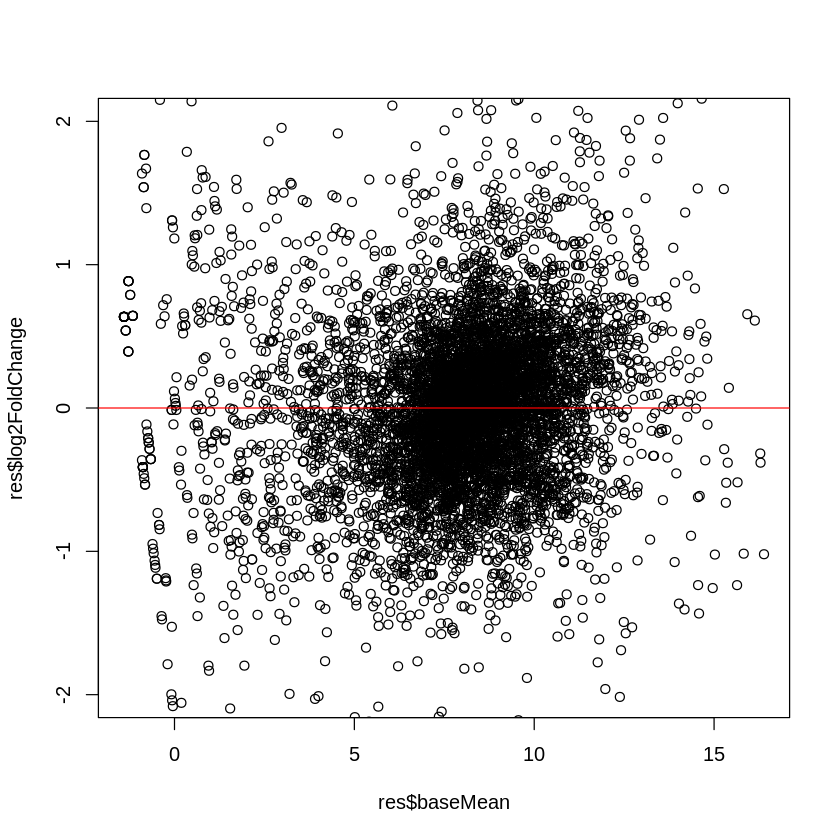

In [88]:
res <- data.frame(
   baseMean = apply(normlized_counts, 1, function(t){(log2(mean(t[4:5])) +log2(mean(t[1:3])))/2}),
   log2FoldChange = apply(normlized_counts, 1, function(t){ log2(mean(t[4:5])) -log2(mean(t[1:3]))})
)
head(res)
plot(res$baseMean,res$log2FoldChange,ylim=c(-2,2),type="p")
abline(h = 0, col = "red")

### PCA

In [30]:
vsd <- vst(dds,blind=FALSE) # 数据均一化
vsd

class: DESeqTransform 
dim: 7127 5 
metadata(1): version
assays(1): ''
rownames(7127): ETS1-1 ETS1-2 ... tY(GUA)O tY(GUA)Q
rowData names(22): baseMean baseVar ... maxCooks dispFit
colnames(5): EV_4 EV_3 DNMT3B_4 DNMT3B_2 DNMT3B_3
colData names(3): sample_id Condition sizeFactor

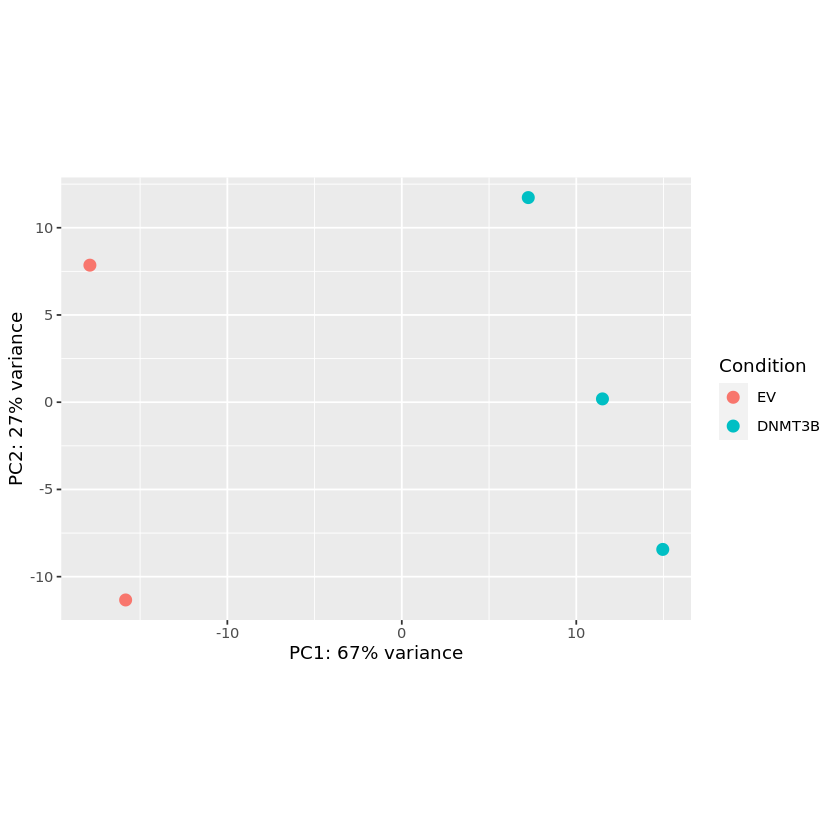

In [31]:
library('ggplot2')
pcaData <- plotPCA(vsd, intgroup=c("Condition"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
plot_fig <- ggplot(pcaData, aes(PC1, PC2, color=Condition)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()
#ggsave(plot_fig,filename = "yeast_DESeq2_PCA.pdf")
plot_fig

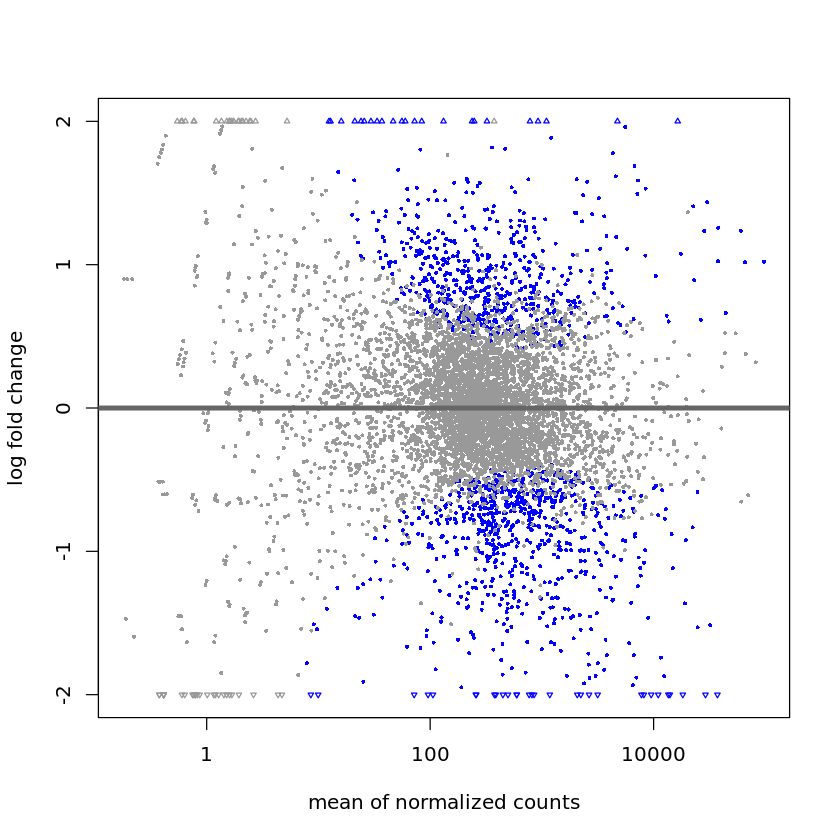

In [35]:
#pdf("yesat_DESeq2_MAplot.pdf")
plotMA(res, ylim=c(-2,2))
#dev.off()

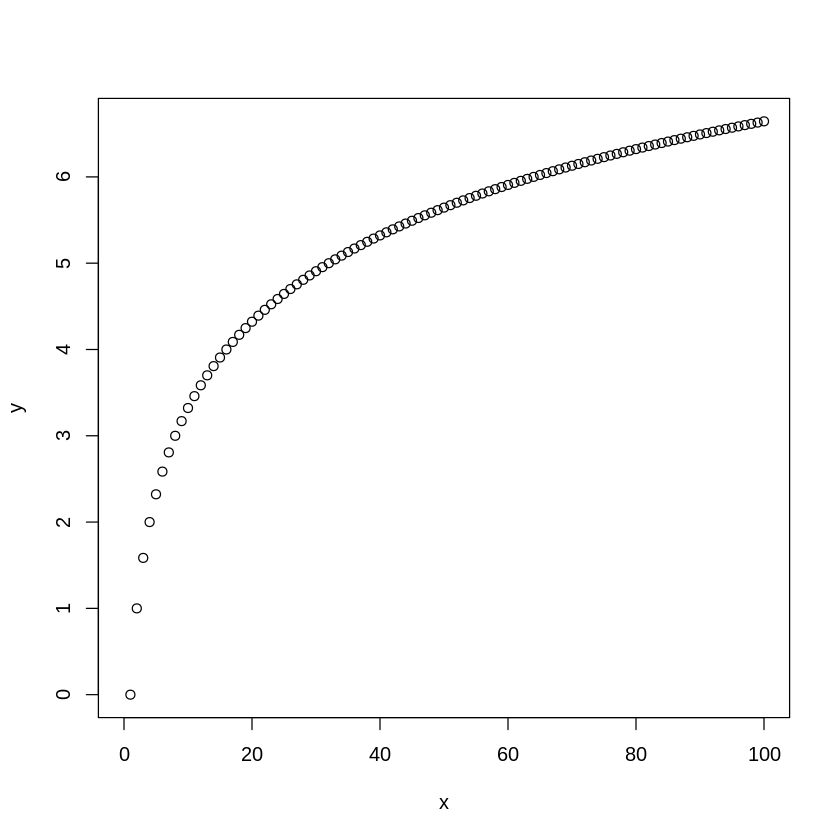

In [11]:
x <- c(0:100)
y <- log2(x)
plot(x,y)

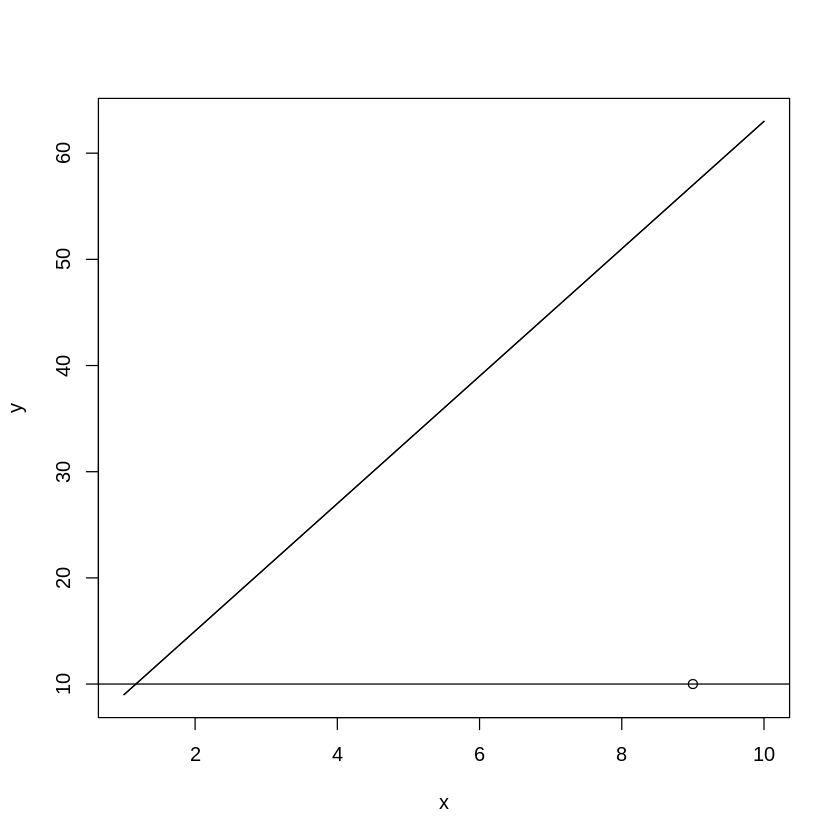

In [77]:
x <- c(1:10)
y <- x*2+1
y <- x*6+3
plot(x,y,type='l')
points(9,10)
lines(x,y)
abline(10,0)